In [1]:
import pandas as pd
#from packages import dstats as ds
#from packages import plots
#from packages import OTF
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'packages'

In [2]:
df = pd.read_csv("pima-indians-diabetes_label.csv")

In [3]:
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## EDA

In [4]:
df.isna().sum()

preg     0
plas     0
 pres    0
skin     0
 test    0
mass     0
pedi     0
 age     0
class    0
dtype: int64

In [5]:
ds.describe(df)

,preg,plas,pres,skin,test,mass,pedi,age,class
DataType,int64,int64,int64,int64,int64,float64,float64,int64,int64
Count,768,768,768,768,768,768,768,768,768
Min,0,0,0,0,0,0,0.078,21,0
Q1,1,99,62,0,0,27.3,0.24375,24,0
Q2,3,117,72,23,30.5,32,0.3725,29,0
Mean,3.85,120.89,69.11,20.54,79.8,31.99,0.47,33.24,0.35
Q3,6,140.25,80,32,127.25,36.6,0.62625,41,1
Max,17,199,122,99,846,67.1,2.42,81,1
Std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
Skew,0.9,0.17,-1.84,0.11,2.27,-0.43,1.92,1.13,0.64


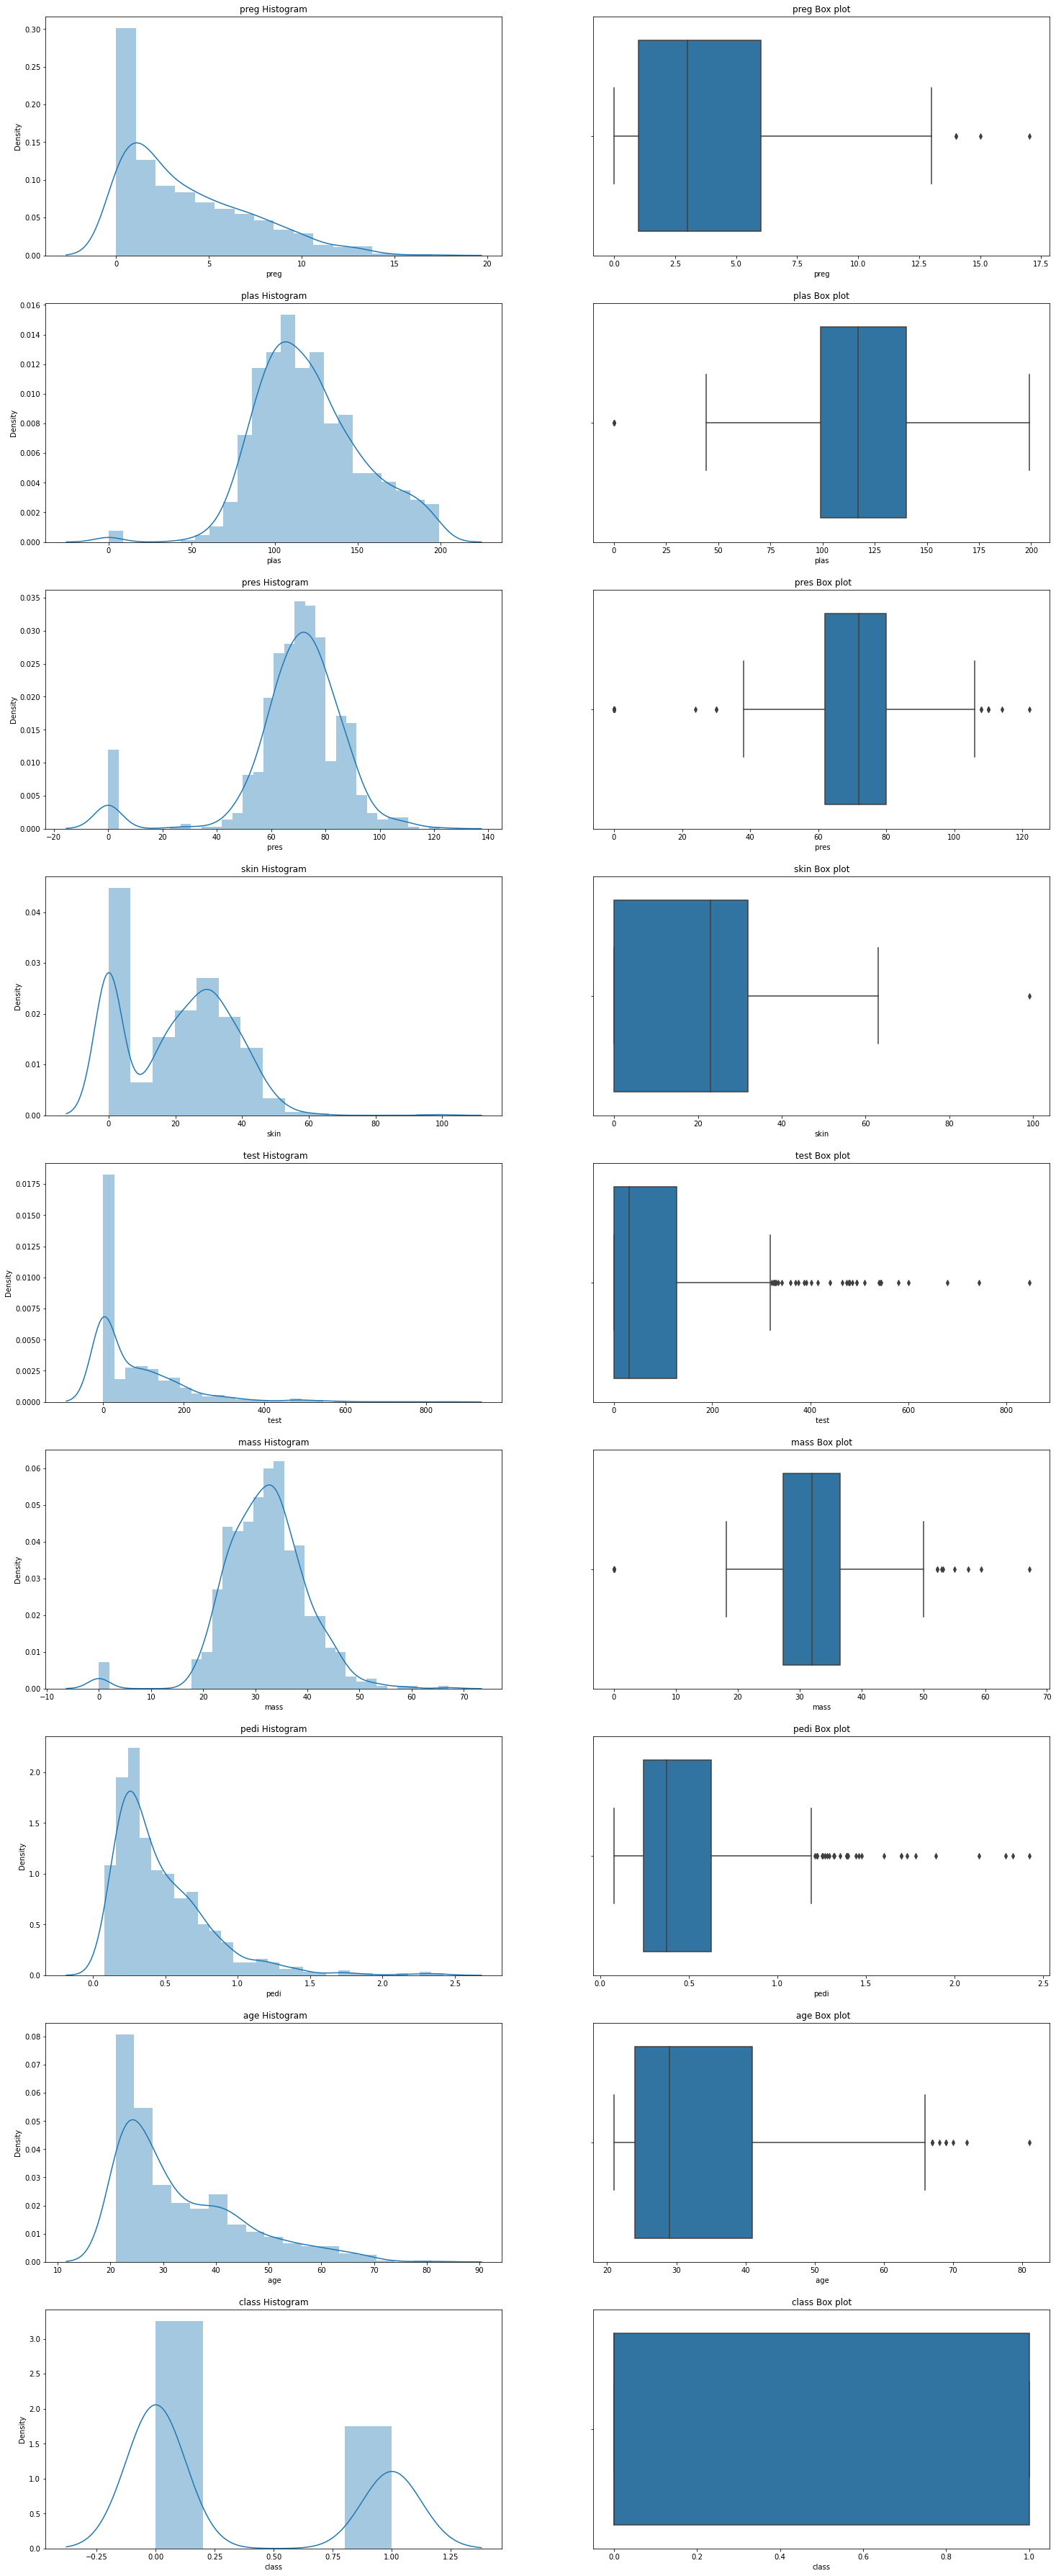

<Figure size 1800x576 with 0 Axes>

In [6]:
plots.summarize(df)

## Outlier treatment

In [7]:
df = OTF.median_ot(df)

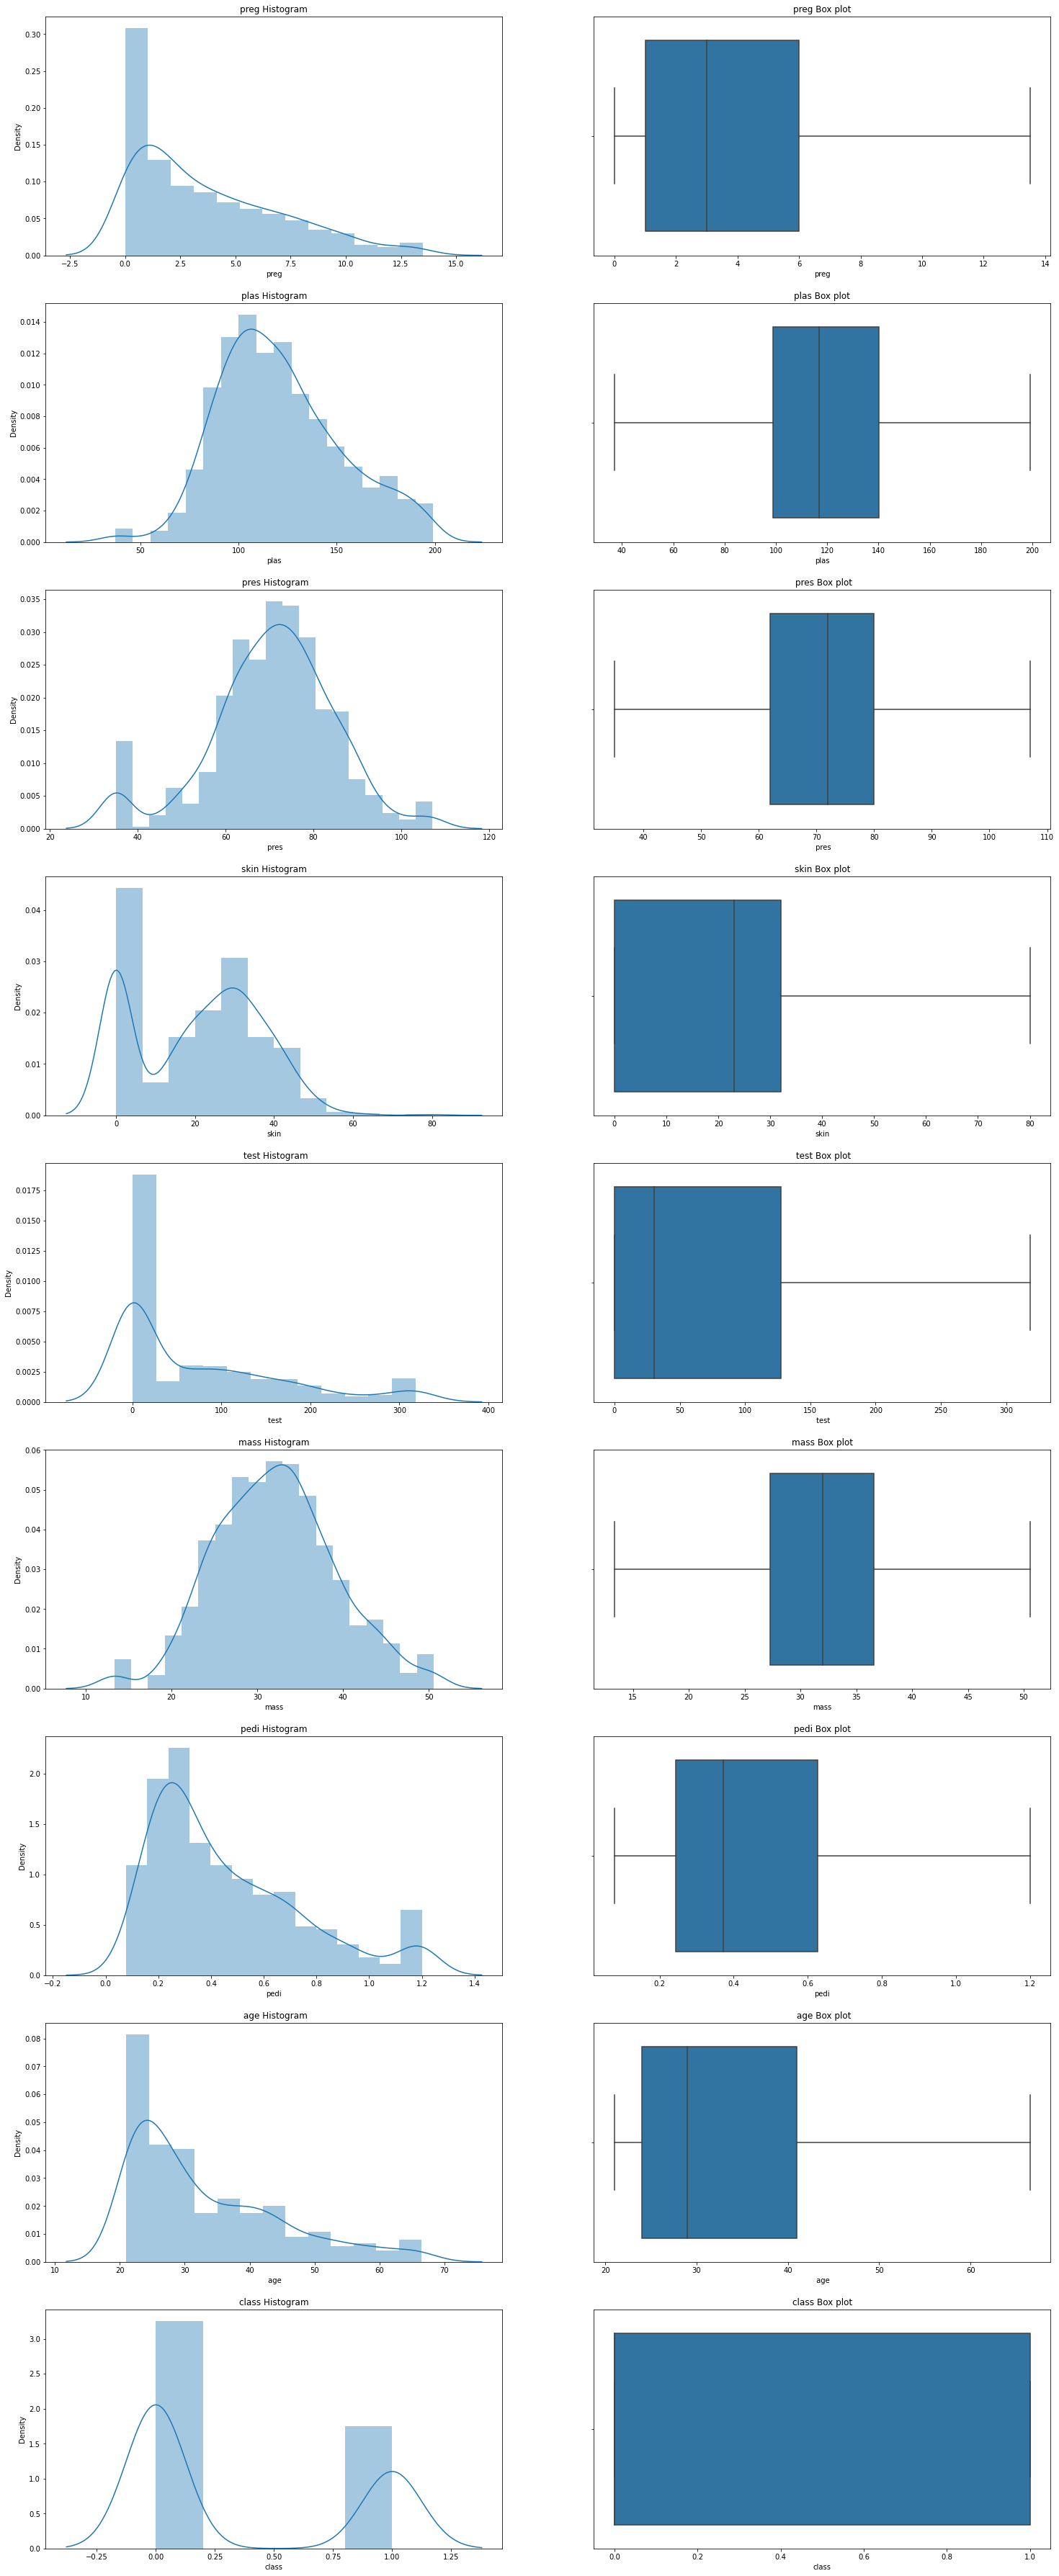

<Figure size 1800x576 with 0 Axes>

In [8]:
plots.summarize(df)

## Split training and testing data

In [9]:
df.columns

Index(['preg', 'plas', ' pres', 'skin', ' test', 'mass', 'pedi', ' age',
       'class'],
      dtype='object')

In [10]:
x = df.drop('class', 1)

In [11]:
y = df['class']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

## Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
lr_model = LogisticRegression()

In [15]:
lr_model.fit(x_train,y_train)

LogisticRegression()

## Performance mertrics

### R2 score

In [16]:
print("Train score is: ",round(lr_model.score(x_train,y_train)*100,2),"%", sep="")

Train score is: 78.58%


In [17]:
print("Test score is: ",round(lr_model.score(x_test,y_test)*100,2),"%", sep="")

Test score is: 74.46%


### Confusion matrix 

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
y_train_predict = lr_model.predict(x_train)
confusion_matrix(y_train_predict,y_train)

array([[311,  77],
       [ 38, 111]], dtype=int64)

In [20]:
y_test_predict = lr_model.predict(x_test)
confusion_matrix(y_test_predict,y_test)

array([[123,  31],
       [ 28,  49]], dtype=int64)

### F1 score

In [21]:
from sklearn.metrics import f1_score

In [22]:
print("F1 score on training data is: {0:0.2f}%".format(f1_score(y_train,y_train_predict, average = 'weighted')*100))

F1 score on training data is: 77.91%


In [24]:
print("F1 score on testing data is: {0:0.2f}%".format(f1_score(y_test,y_test_predict, average = 'weighted')*100))

F1 score on testing data is: 74.34%
